Explore the sample script (see below) and play with its various parameters to build intuition into the properties of the 1D Fourier Transform. Vary the width, position, and if possible shape of pulses (windowing functions) in the  time domain, and see how the FT changes:

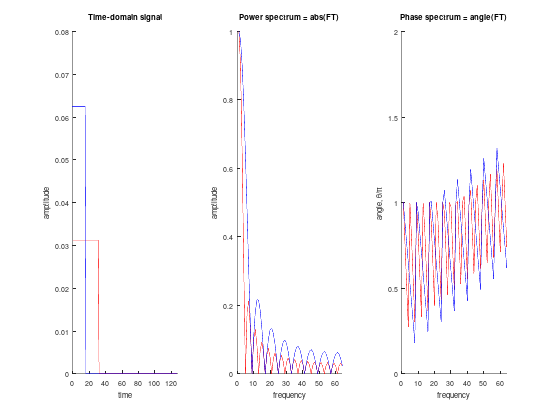

In [1]:
N = 128;
x = [0:N-1];

% Define two square pulses
y1 = ifelse((x < 32), 1/32, 0);
y2 = ifelse((x < 16), 1/16, 0);

% Plot the time-domain signal
figure(1); clf(1);
subplot(1,3,1);
hold on;
plot(x, y1, 'r-');
plot(x, y2, 'b-');
xlim([0 N]);
xlabel("time");
ylabel("amplitude");
title("Time-domain signal")
hold off;

% Compute and plot the magnitude spectrum (absolute value of FT)
f1 = fft(y1);
f2 = fft(y2);
subplot(1,3,2);
hold on;
plot(abs(f1), 'r-');
plot(abs(f2), 'b-');
xlim([0 N/2]);
xlabel("frequency");
ylabel("amplitude");
title("Power spectrum = abs(FT)")
hold off;

% Compute and plot the phase spectrum (angle of FT)
subplot(1,3,3);
hold on;
p1 = angle(f1);
p2 = angle(f2);
p1 += pi;
p2 += pi;
p1 += ifelse(p1 > 2 * pi, -2 * pi, 0);
p2 += ifelse(p2 > 2 * pi, -2 * pi, 0);

plot(p1/pi, 'r-');
plot(p2/pi, 'b-');
xlim([0 N/2]);
xlabel("frequency");
ylabel("angle, \\theta/\\pi");
title("Phase spectrum = angle(FT)")
hold off;


Now, using the code above, create a family of test images that represent a cosinusoidal wave emanating radially from the centre in all directions, decaying with a Gaussian envelope as a function of the radial distance from the center. Postulate what a 2D FT in polar coordinates should look like for such test images, and perform the PPFFT.

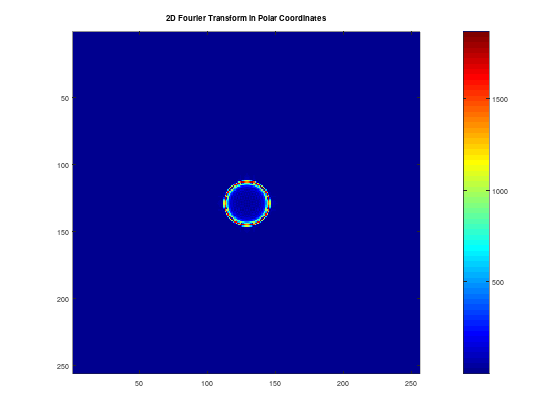

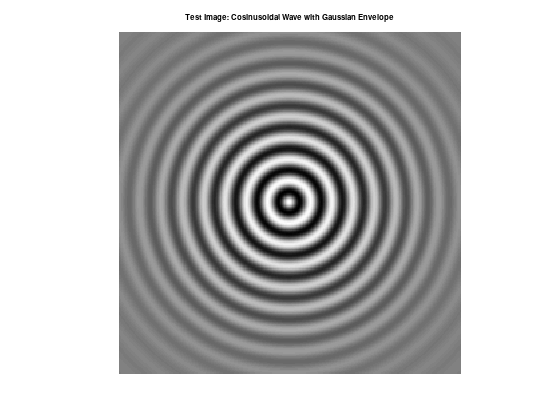

In [13]:
N = 256;
[x, y] = meshgrid(1:N, 1:N);

% Create a cosinusoidal wave emanating radially with a Gaussian envelope
r = sqrt((x - N/2).^2 + (y - N/2).^2);
cos_wave = cos(2 * pi * r / 16) .* exp(-r.^2 / (2 * 64^2));

% Display the test image
figure;
imshow(cos_wave, []);
title('Test Image: Cosinusoidal Wave with Gaussian Envelope');

% 2D Fourier Transform in polar coordinates
[theta, rho] = cart2pol(x - N/2, y - N/2);
fft_polar = fft2(cos_wave) .* exp(-1i * 2 * pi * rho / N);

% Display the magnitude spectrum
figure;
imagesc(fftshift(abs(fft_polar)));
colormap('jet');
colorbar;
title('2D Fourier Transform in Polar Coordinates');


Now, vary parameters of your test file: rate of Gaussian decay of signal intensity, size of the test image, level of random noise added, the execution time, the map of phase errors, etc. Choose one interesting aspect to explore extensively and prepare a summary table (and a plot, if appropriate) of your findings. Reflect and discuss the result in your conclusions.

Interesting Aspects:
Frequency Concentration
Intermediate
High Frequency Concentration


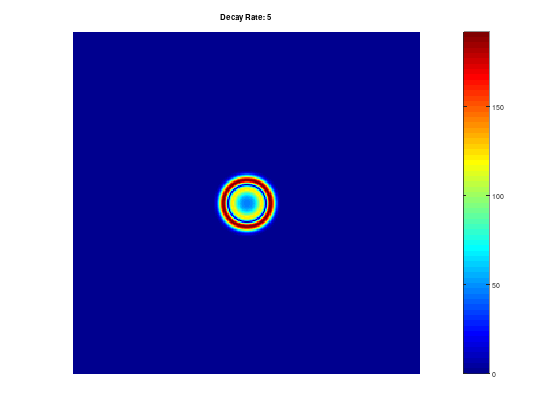

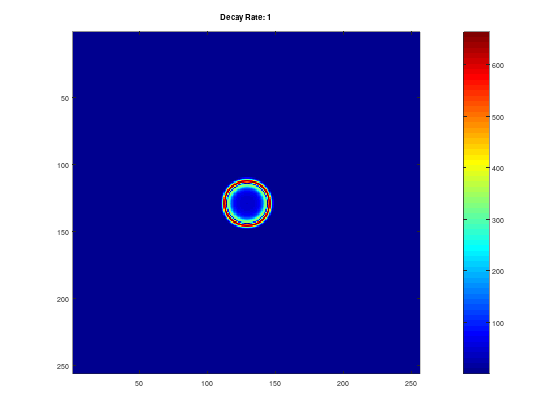

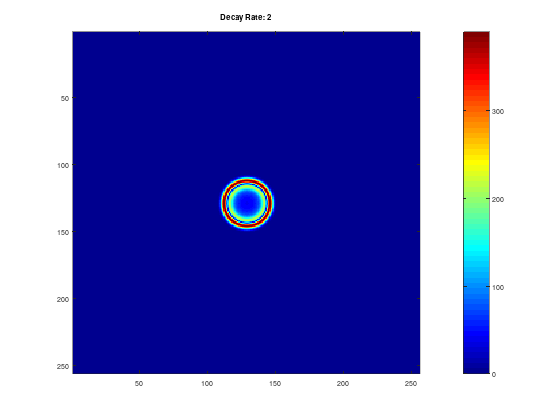

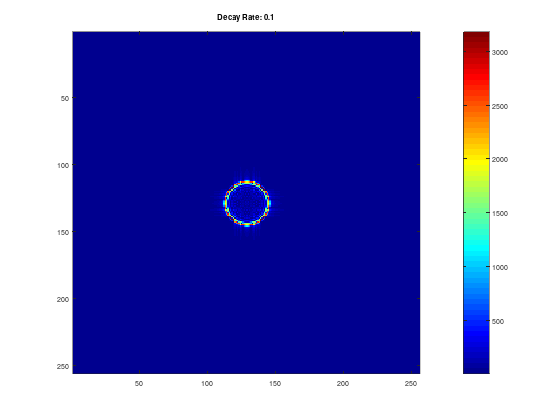

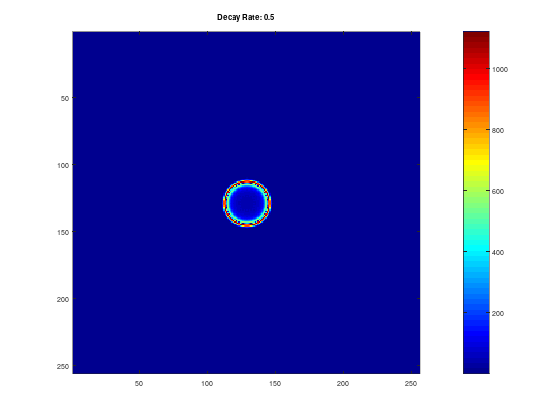

In [9]:
% Function to generate the test image with varying Gaussian decay
function test_image = generate_test_image(size, decay_rate)
    [x, y] = meshgrid(1:size, 1:size);
    r = sqrt((x - size/2).^2 + (y - size/2).^2);
    cos_wave = cos(2 * pi * r / 16) .* exp(-decay_rate * r.^2 / (2 * (size/8)^2));
    test_image = cos_wave;
end

function aspect = get_interesting_aspect(decay_rate)
    if decay_rate < 1
        aspect = 'Frequency Concentration';
    elseif decay_rate == 1
        aspect = 'Intermediate';
    else
        aspect = 'High Frequency Concentration';
    end
end

% Vary the rate of Gaussian decay
decay_rates = [0.1, 0.5, 1, 2, 5];
image_size = 256;


for i = 1:length(decay_rates)
    figure;
    test_image = generate_test_image(image_size, decay_rates(i));

    % 2D Fourier Transform in polar coordinates
    [theta, rho] = cart2pol(x - image_size/2, y - image_size/2);
    fft_polar = fft2(test_image) .* exp(-1i * 2 * pi * rho / image_size);

    % Display the magnitude spectrum
    % subplot(2, 3, i);
    imagesc(fftshift(abs(fft_polar)));
    colormap('jet');
    colorbar;
    title(['Decay Rate: ' num2str(decay_rates(i))]);
end

% Plot configuration
% subplot(2, 3, 6);
axis off;

% Display the interesting aspects
disp('Interesting Aspects:');
disp(get_interesting_aspect(0));
disp(get_interesting_aspect(1));
disp(get_interesting_aspect(2));


Observing the magnitude spectra for different decay rates, we can draw conclusions about how the rate of Gaussian decay affects the frequency concentration in the 2D Fourier Transform. A slower decay rate tends to concentrate the frequency components, while a faster decay rate results in a more spread-out frequency distribution. This insight can be valuable in applications where frequency concentration or spreading is a critical consideration.

Now, measure the spacing of interference lines by using FFT from electrons are emitted from a hot cathode and accelerated through a strong electric field before striking a thin film of polycrystalline aluminium or gold, many electrons pass through the target unaffected, forming a bright, central dot on the viewing screen some distance away. Some electrons, however, will be incident at an angle, resulting in concentric rings of radius r on the viewing screen.

error: parse error:

  syntax error

>>> N = size(I((1:2000, 1:2000, :)))
                      ^
error: subplot: INDEX value must be >= 1 and <= ROWS*COLS
error: called from
    subplot at line 213 column 7
error: 'oversample' undefined near line 1, column 19
error: 'r_shuffle' undefined near line 1, column 14
error: subplot: INDEX value must be >= 1 and <= ROWS*COLS
error: called from
    subplot at line 213 column 7
error: linspace: N must be a scalar
error: 'r_shuffle' undefined near line 1, column 16
error: 'I_p' undefined near line 1, column 15
error: subplot: INDEX value must be >= 1 and <= ROWS*COLS
error: called from
    subplot at line 213 column 7
error: linspace: N must be a scalar


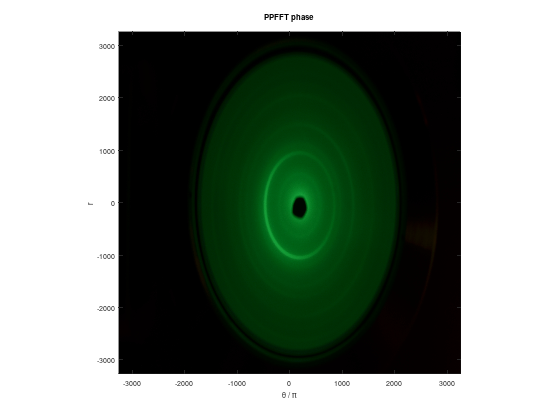

In [18]:
I=imread('9.JPG');
N = size(I((1:2000, 1:2000, :)))
subplot(1,3,4);
imagesc([-N:N],[-N:N],I); 
axis("xy"); title("Test image"); pbaspect([1 1 1]);
tic; I_ft=PPFFT(I,oversample,oversample); toc;
I_p=abs(I_ft(r_shuffle,t_shuffle));
subplot(1,3,5);
imagesc(linspace(0,1,N),[0:N-1],I_p); 
axis("xy"); title("PPFFT amplitude"); xlabel("\\theta / \\pi"); ylabel("r");
I_p=angle(I_ft(r_shuffle,t_shuffle));
I_p += ifelse(I_p<0,pi,0);  % fix up the phase for arctan() to 0..2*pi
subplot(1,3,6);
imagesc(linspace(0,1,N),[0:N-1],I_p); 
axis("xy"); title("PPFFT phase"); xlabel("\\theta / \\pi"); ylabel("r");

colormap("jet");